In [142]:
from scipy import stats
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
df = pd.read_csv('data/merged.csv')
df

,Zip Code,City,Pills,Tax Returns,AGI thousands,Population,Death Rate
0,94550,LIVERMORE,52022690,21341,2066480,46896,1.63
1,90242,DOWNEY,21791650,17767,726095,43497,2.65
2,92010,CARLSBAD,10548200,6737,495599,14382,12.55
3,95350,MODESTO,6547370,20938,891634,51046,2.19
4,95825,SACRAMENTO,6087880,13817,591794,31084,2.75
...,...,...,...,...,...,...,...
668,95033,LOS GATOS,200,4012,552488,9372,5.35
669,93725,FRESNO,180,9020,280513,24979,4.43
670,95215,STOCKTON,130,8467,316574,23224,35.97
671,94930,FAIRFAX,100,4029,319932,8500,5.44


In [144]:
population = pd.DataFrame({
    'PPP': df['Pills'] / df['Population'],
    'Deaths': df['Population'] / df['Death Rate']
})

In [145]:
xd = (population['PPP'])
yd = (population['Deaths'])

def powlaw(x, a, b, c) :
    return a * np.exp(x * -b) * pow(x, c)
popt, pcov = curve_fit(powlaw, xd, yd, p0=[-5, 0.005, 0.005])
popt

array([1.19782368e+04, 1.79985846e-02, 1.60265511e-01])

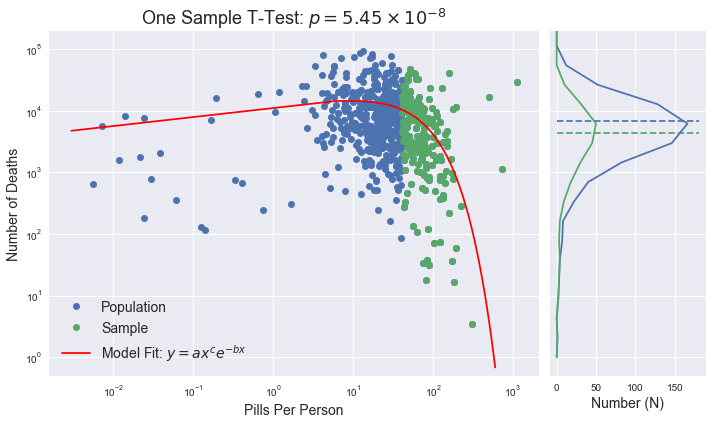

In [260]:
w = population['PPP'] > population['PPP'].mean()
sample = population[w]

import matplotlib.gridspec as gridspec
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(1, 4)

plt.subplot(gs[0, :-1])
plt.plot(population['PPP'], population['Deaths'], 'o', label='Population')
plt.plot(sample['PPP'], sample['Deaths'], 'o', label='Sample')
xf = np.linspace(3e-3, 6e2, 100)
plt.plot(xf, powlaw(xf, *popt), 'r-', label=r'Model Fit: $y=ax^ce^{-bx}$')
plt.legend(loc=3, fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.title(r'One Sample T-Test: $p=5.45 \times 10^{-8}$', size=18)
plt.xlabel('Pills Per Person', size=14)
plt.ylabel('Number of Deaths', size=14)
plt.ylim(5e-1, 2e5)

plt.subplot(gs[0, 3])
nbins = 20
vert_hist = np.histogram(population['Deaths'], bins=np.logspace(0, 6, nbins))
plt.plot(vert_hist[0], vert_hist[1][:-1], '-')
vert_hist = np.histogram(sample['Deaths'], bins=np.logspace(0, 6, nbins))
plt.plot(vert_hist[0], vert_hist[1][:-1], '-')
plt.yscale('log')
plt.ylim(5e-1, 2e5)
plt.yticks(np.logspace(0, 5, 6), ['']*6)
plt.xlabel('Number (N)', size=14)
plt.hlines(population['Deaths'].median(), 0, 180, color='C0', ls='--')
plt.hlines(sample['Deaths'].median(), 0, 180, color='C1', ls='--')

plt.tight_layout()
plt.savefig('images/n-deaths-vs-pill-rate.png', dpi=300)

In [180]:
stats.ttest_1samp(sample['Deaths'], population['Deaths'].mean())

Ttest_1sampResult(statistic=-5.64091663517241, pvalue=5.453329907071625e-08)

In [148]:
critical_value = stats.chi2.ppf(q=0.95, df=len(yd)-2)
print(critical_value)
stats.chisquare(yd, powlaw(xd, *popt))

732.3718714538783


Power_divergenceResult(statistic=10536569911801.541, pvalue=0.0)